In [1]:
%pylab inline
import numpy.linalg

Populating the interactive namespace from numpy and matplotlib


In [2]:
sz = np.array([[1,0,0],[0,0,0], [0,0,-1]])
sy = 1/sqrt(2)/1j*np.array([[0,1,0], [-1,0,1], [0,-1,0]])
sx = 1/sqrt(2)*np.array([[0,1,0], [1,0,1], [0,1,0]])
sz2 = sz*sz
sx2 = sx*sx
sy2 = sy*sy
id3 = np.array([[1,0,0], [0,1,0], [0,0,1]])

In [3]:
def hami(d, e, bx, by, bz):
    hzfs = d*sz2 + e * (sx2-sy2)
    helezeeman = 2.8*(bx*sx + by*sy + bz*sz)
    return hzfs+helezeeman

#transform vector from lab system into the four NV systems:
#we just need to find axial and transversal components, 
#since transversal directions are equal in hamiltonian, and we assume RF polarization to be diagonally polarized
def lab2nvs(b):
    #the four NV axes in the lab system:
    nv_axes = 1/sqrt(3) * np.array([
                       [1,1,1],
                       [1,-1,-1],
                       [-1,-1,1],
                       [-1,1,-1]
                       ])
    #projection onto axes:
    axial = dot(nv_axes, b)
    transversal = np.sqrt(np.abs(norm(b)**2 - axial**2))
    #let's just assign the transversal component to the x axes
    b_nvs = vstack([transversal, zeros(4), axial])
    return b_nvs

In [4]:
npoints = 3000
bdir = np.array([1,0,0])
bnv = lab2nvs(bdir)
bdir = bnv[:,0]/scipy.linalg.norm(bnv[:,0])
bf = linspace(0, 3000, npoints)
evaarray = zeros((3, npoints))
evearray = zeros((3, 3, 2*npoints))
evearray.dtype = 'complex128'

In [5]:
bfi = asarray([bdir*bval for bval in bf])
sza = array([1,0,-1])
thres = 1e-3
for i, b in enumerate(bf):
    eva, eve = numpy.linalg.eig(hami(2870, 0, bfi[i, 0], bfi[i, 1], bfi[i,2]))
    for k, evec in enumerate(eve.transpose()):
        eve[k, :] = evec/scipy.linalg.norm(evec)
    eva[abs(eva)< thres] = 0
    eve[abs(eve)< thres] = 0
    evaarray[:, i] = eva.real-min(eva.real)
    evearray[:, :, i] =  eve

Text(0,0.5,'$\\omega$ (MHz)')

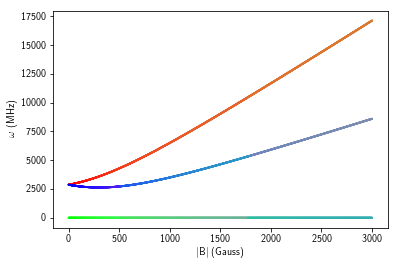

In [6]:
plt.figure()
ms = 0.8
cs = zeros((len(bf) , 3, 3))
for i, bfi in enumerate(bf):
    even = abs(evearray[:,:,i])
    evenn = even.transpose()
    cs[i, :, :] = evenn
plt.scatter(bf, evaarray[0, :], s=ms, c=cs[:,0,:])
plt.scatter(bf, evaarray[1, :], s=ms, c=cs[:,1,:])
plt.scatter(bf, evaarray[2, :], s=ms, c=cs[:,2,:])
xlabel('|B| (Gauss)')
ylabel('$\omega$ (MHz)')